In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=1000,n_features=2,centers=3,random_state=42)

In [3]:
X

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]], shape=(1000, 2))

In [4]:
y

array([2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0,
       2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2,
       0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1,
       1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1,
       2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0,
       0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2,

[]

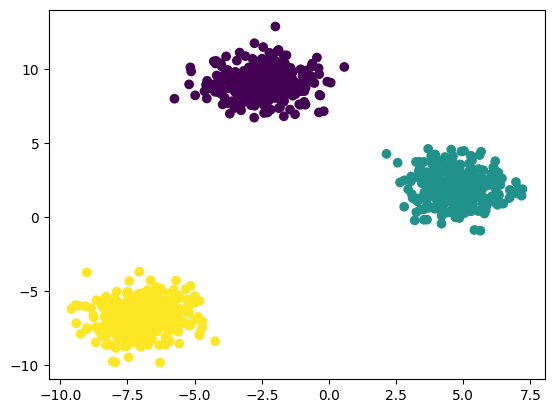

In [5]:
# visualization
plt.scatter(x=X[:,0],y=X[:,1],c=y)
plt.plot()

In [6]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [7]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [8]:
# using elbow method to calculate the K-value
from sklearn.cluster import KMeans

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [9]:
wcss

[1500.000000000001,
 475.0082823036354,
 48.32826902006258,
 41.12797158880285,
 36.08136032832997,
 32.4748942825895,
 26.530901852744606,
 24.06606841070106,
 22.37505465325467,
 19.153880606474015]

[]

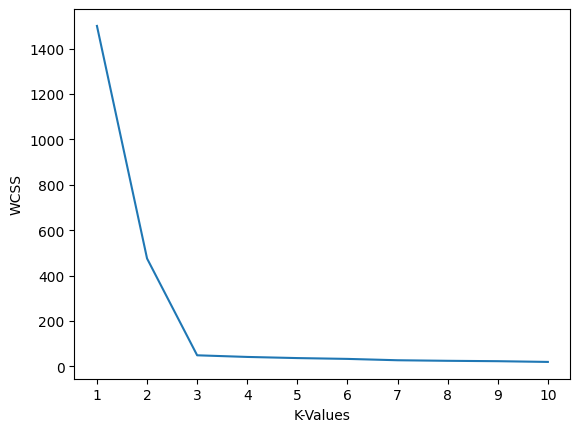

In [10]:
# plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("K-Values")
plt.ylabel("WCSS")
plt.plot()

# Elbow at K=3

In [11]:
# apply kmeans with k=3
kmeans=KMeans(n_clusters=3,init='k-means++')
kmeans.fit(X_train)

KMeans(n_clusters=3)

In [12]:
y_pred=kmeans.predict(X_test)
y_pred

array([0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0,
       0, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 1, 1, 2,
       0, 1, 2, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2,
       2, 2, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 1, 2, 2,
       1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2,
       0, 0, 1, 1, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 2,
       0, 2, 1, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 1, 0,
       1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2,
       2, 2, 1, 2, 1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2,
       1, 1, 1, 0, 0, 0, 2, 0], dtype=int32)

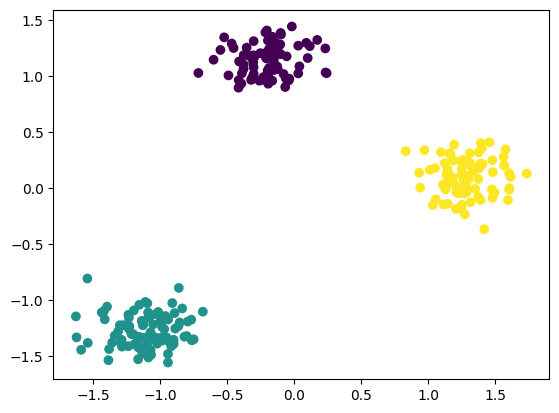

In [13]:
# plotting
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)
plt.show()

In [14]:
# validating the K-value
# kneelocator
!pip install kneed

In [15]:
from kneed import  KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [16]:
kl.elbow

np.int64(3)

In [19]:
# Silhouette scoring
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X=X_train,labels=kmeans.labels_)
    silhouette_coefficients.append(score)

In [22]:
silhouette_coefficients

[np.float64(0.6858962379798892),
 np.float64(0.8427991777637874),
 np.float64(0.6805073447555435),
 np.float64(0.512602296644073),
 np.float64(0.5019556705649886),
 np.float64(0.3487057838212093),
 np.float64(0.3310428124305757),
 np.float64(0.33431353259026986),
 np.float64(0.33639387557450934)]

[]

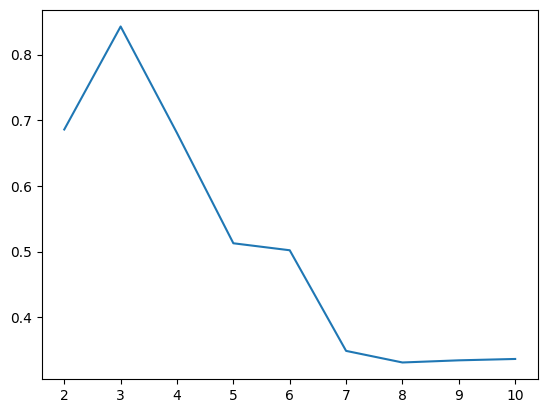

In [23]:
# plot for silhouette score vs k-values
plt.plot(range(2,11),silhouette_coefficients)
plt.plot()

# Highest Silhouette score at K=3, so K=3 is selected